# Sales Dashboard Analysis
This project performs Exploratory Data Analysis and Dashboard creation on the Sample Superstore dataset to derive sales and profit insights across various regions and categories.

**Author**: Susan Chandra Bonkuri  
**Institution**: IIITDM Kancheepuram


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv(r"C:\Users\susan\Downloads\archive (8)\Sample - Superstore.csv", encoding='latin1')
df.head()


Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

## Basic Dataset Information
Displaying the shape, column names, data types, and missing values of the dataset.


In [10]:
# Shape of the dataset
df.shape

# Columns and data types
df.info()

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

## Data Cleaning
Checking for duplicates and removing them if any are found.


In [11]:
# Check for duplicate rows
df.duplicated().sum()

# Remove duplicates if present
df = df.drop_duplicates()


## Exploratory Data Analysis
Analyzing key features such as Sales, Profit, Quantity, Discount, and their relationships.


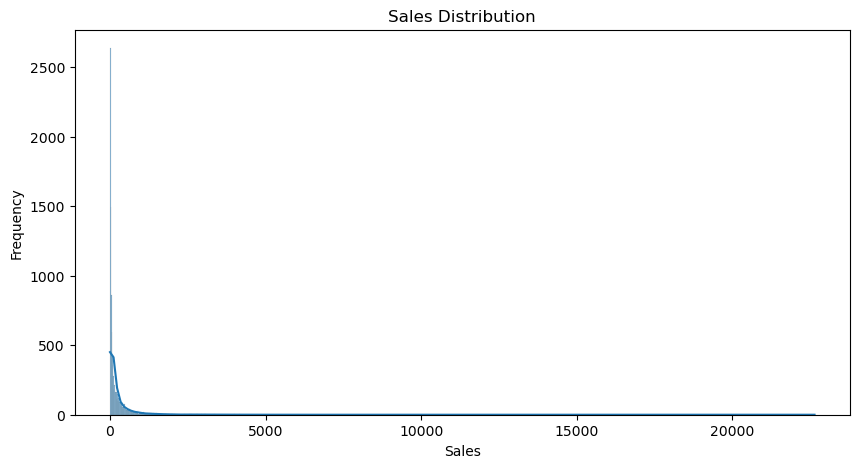

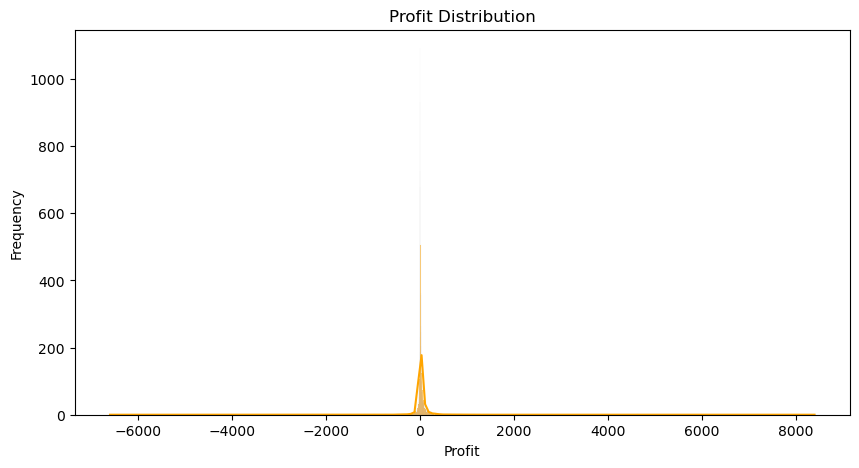

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(df['Sales'], kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df['Profit'], kde=True, color='orange')
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()


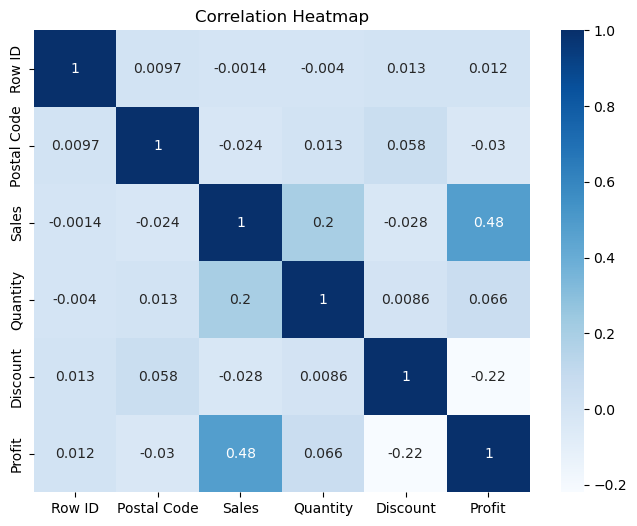

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()


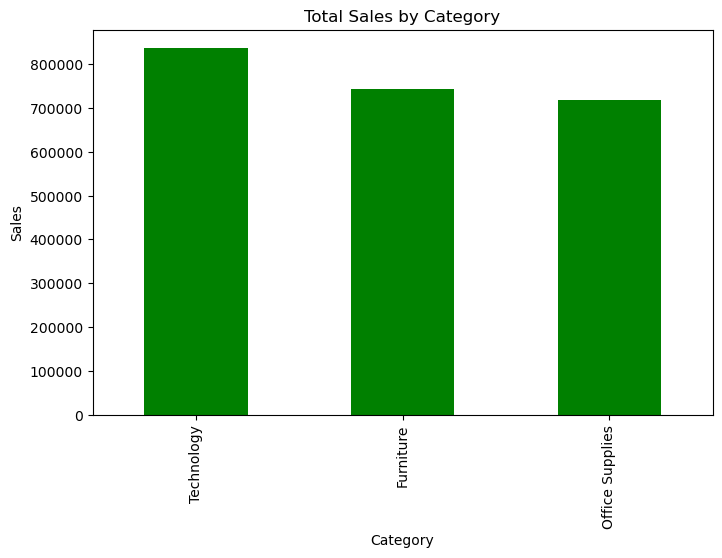

In [15]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', figsize=(8,5), color='green')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()


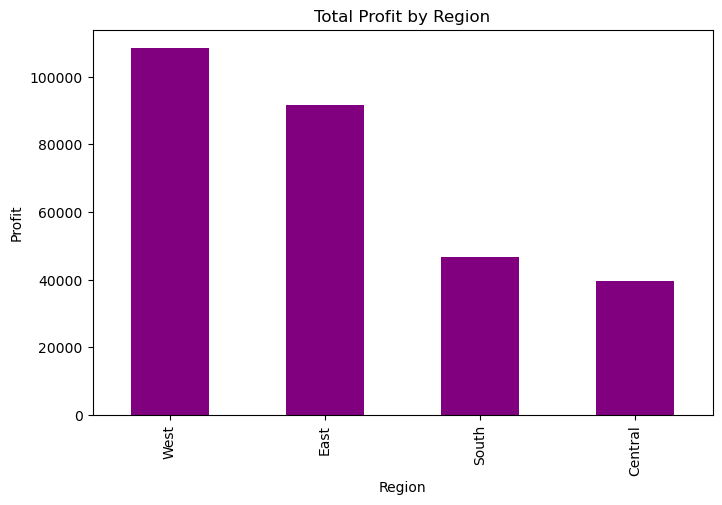

In [16]:
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
region_profit.plot(kind='bar', figsize=(8,5), color='purple')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.show()


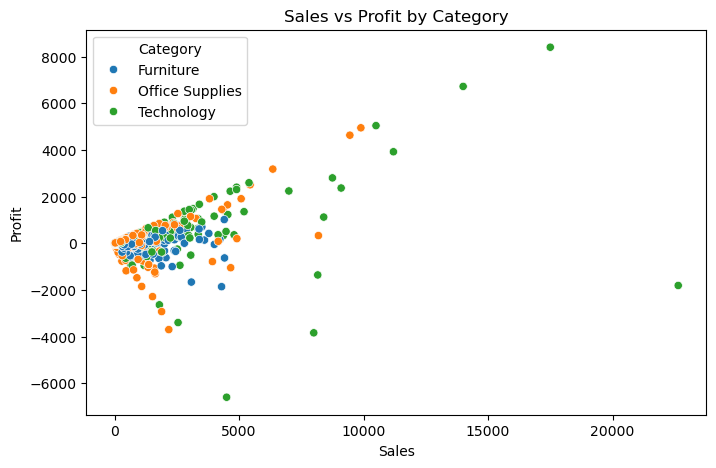

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category')
plt.title('Sales vs Profit by Category')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


## Conclusion
1. The dataset is clean with no missing values and no duplicates.
2. Most sales are contributed by the 'Technology' category.
3. The 'West' region generates the highest profit.
4. There is a visible relationship between high sales and reduced profit margins in some cases.
5. The data can be used to make informed decisions regarding discounts and product placements.


In [19]:
!pip install plotly


In [20]:
import plotly.express as px


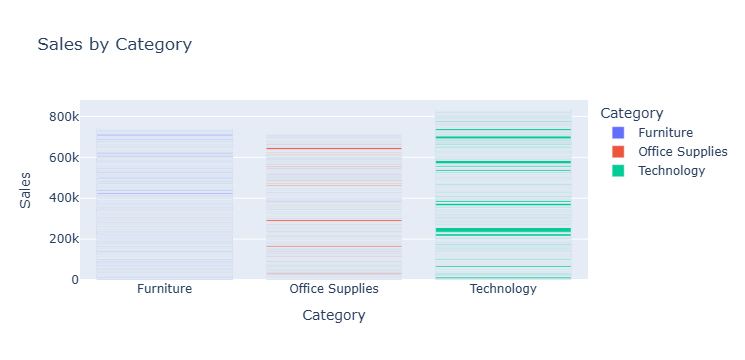

In [21]:
fig = px.bar(df, x='Category', y='Sales', color='Category', title='Sales by Category')
fig.show()


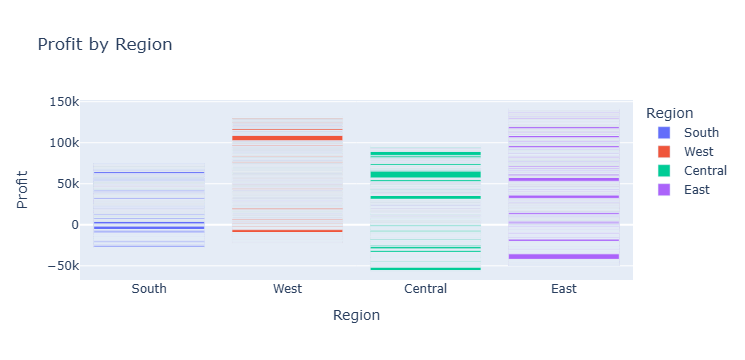

In [22]:
fig = px.bar(df, x='Region', y='Profit', color='Region', title='Profit by Region')
fig.show()


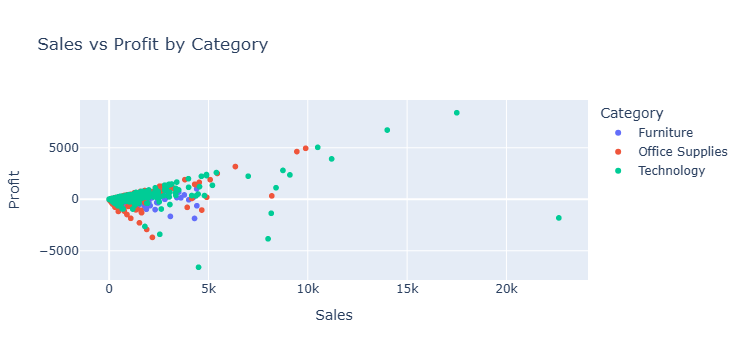

In [23]:
fig = px.scatter(df, x='Sales', y='Profit', color='Category', title='Sales vs Profit by Category', hover_data=['Sub-Category'])
fig.show()


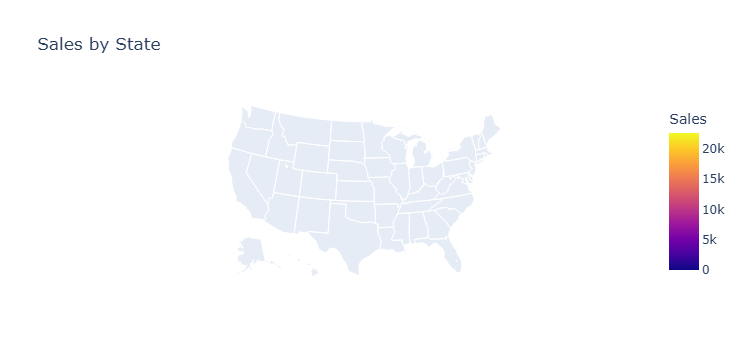

In [24]:
fig = px.choropleth(df, 
                    locations='State', 
                    locationmode='USA-states', 
                    color='Sales', 
                    scope="usa", 
                    title='Sales by State')
fig.show()


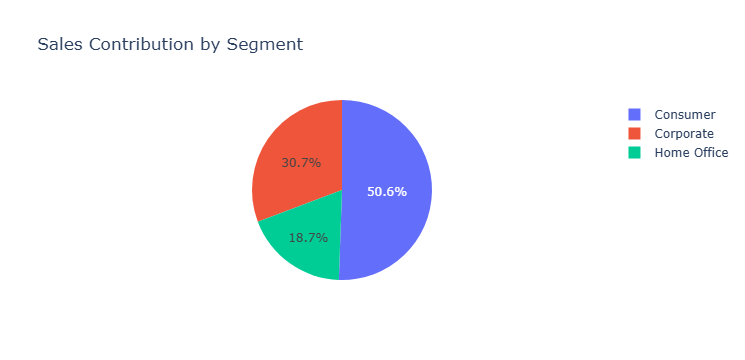

In [25]:
fig = px.pie(df, names='Segment', values='Sales', title='Sales Contribution by Segment')
fig.show()


## Dashboard Summary
1. Sales and profit visualized across categories and regions.
2. Interactive scatter plot showing relationship between Sales and Profit.
3. Choropleth map displaying sales across US states.
4. Segment-wise sales shown using pie chart.
